A Programmer's Pay Analysis

Patrick Salsbury

The scope of this project is to determine if there are relationships between the salary of a programmer and their years coding, the age they first code, their education level, the language they work with, and whether or not they do it as a hobby. In addition, I will be using a csv file full of data that was obtained through a survey conducted on users who visited stackoverflow.com for a short period of time.

I obtained all my data from https://www.kaggle.com/boss0ayush/salary-survey-data . I was inspired to do this project because I noticed that no one else has submitted any analysis yet and also because I am considering a field in computer science/data science and I thought it would be useful to see any helpful correlations in a career I am pursuing as my first data science project.

In [663]:
import pandas
import numpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Let us read in the data from the file and do a quick observation.

In [664]:
data = pandas.read_csv("survey_results_public.csv")
print("Size of data:", data.shape)
data.head()

Size of data: (64461, 61)


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


After examining the data, we can see there are 61 columns and a lot of them are useless to us in terms of our experiment. Therefore let us extract only the columns that we think will be useful examining the correlation in terms with.

In [665]:
data = data[["CompTotal","Country","Hobbyist","Age1stCode","EdLevel","YearsCode","LanguageWorkedWith"]]
print("Size of data:", data.shape)
data.head(10)

Size of data: (64461, 7)


,CompTotal,Country,Hobbyist,Age1stCode,EdLevel,YearsCode,LanguageWorkedWith
0,NaN,Germany,Yes,13,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",36,C#;HTML/CSS;JavaScript
1,NaN,United Kingdom,No,19,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,JavaScript;Swift
2,NaN,Russian Federation,Yes,15,NaN,4,Objective-C;Python;Swift
3,NaN,Albania,Yes,18,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7,NaN
4,NaN,United States,Yes,16,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15,HTML/CSS;Ruby;SQL
5,NaN,Germany,No,14,"Secondary school (e.g. American high school, G...",6,HTML/CSS;Java;JavaScript
6,NaN,India,Yes,18,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,C#;HTML/CSS;PHP
7,116000.0,United States,Yes,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,Python;SQL
8,NaN,Tunisia,No,20,"Professional degree (JD, MD, etc.)",6,HTML/CSS;JavaScript;PHP
9,25000.0,United Kingdom,Yes,14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8,HTML/CSS;Java;JavaScript;Python;SQL


Since we want to see the relationship between income and the other different attributes, we must remove all the rows NaN values in the CompTotal column.

In [666]:
data = data.dropna(subset = ["CompTotal"])
print("Size of data:", data.shape)
data.head()

Size of data: (34826, 7)


,CompTotal,Country,Hobbyist,Age1stCode,EdLevel,YearsCode,LanguageWorkedWith
7,116000.0,United States,Yes,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,Python;SQL
9,25000.0,United Kingdom,Yes,14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8,HTML/CSS;Java;JavaScript;Python;SQL
10,31000.0,United Kingdom,Yes,13,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,C#;JavaScript;Swift
11,1100.0,Spain,No,42,Some college/university study without earning ...,7,HTML/CSS;JavaScript
12,3000.0,Netherlands,Yes,14,"Secondary school (e.g. American high school, G...",35,C;JavaScript;Python


Due to different types of currencies from varying countries, for the sake of this project lets only consider entries from the United States. So lets extract only United States values.

In [667]:
USdata = data[data.Country == "United States"]
print("Size of data:", USdata.shape)
USdata.head()

Size of data: (8171, 7)


,CompTotal,Country,Hobbyist,Age1stCode,EdLevel,YearsCode,LanguageWorkedWith
7,116000.0,United States,Yes,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,Python;SQL
13,66000.0,United States,Yes,13,"Associate degree (A.A., A.S., etc.)",5,HTML/CSS;JavaScript;SQL;TypeScript
16,79000.0,United States,Yes,14,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,C#;HTML/CSS;JavaScript;Python;SQL;VBA
17,105000.0,United States,Yes,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",19,Bash/Shell/PowerShell;HTML/CSS;Perl
18,83400.0,United States,No,15,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...


--------------------------------------------------------------------------------------------------------------------------------------------

1) First lets begin by seeing if there is a correlation between years coding and salary.

In [668]:
yearsCodeData = USdata[["CompTotal","YearsCode"]]

print("Size of data:", yearsCodeData.shape)
yearsCodeData.head()

Size of data: (8171, 2)


,CompTotal,YearsCode
7,116000.0,17
13,66000.0,5
16,79000.0,7
17,105000.0,19
18,83400.0,9


While it may not be shown in the .head(), there are string values within our YearsCode column that need to be dropped by turning into NaN values first.

In [669]:
yearsCodeData.YearsCode = pandas.to_numeric(yearsCodeData.YearsCode,errors="coerce") #turns into NaN if unable to parse string
yearsCodeData = yearsCodeData.dropna()

print("Size of data:", yearsCodeData.shape)
yearsCodeData.head()

Size of data: (8109, 2)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,CompTotal,YearsCode
7,116000.0,17.0
13,66000.0,5.0
16,79000.0,7.0
17,105000.0,19.0
18,83400.0,9.0


After a quick examination of the data, we can see there are outliers for Age and CompTotal so we must drop them in order to conduct a proper analysis.

Although there are plenty of methods of figuring out which values are outliers, let us utilize matplotlib's boxplot in order to visually see how many values are outside the lower and upper whiskers.

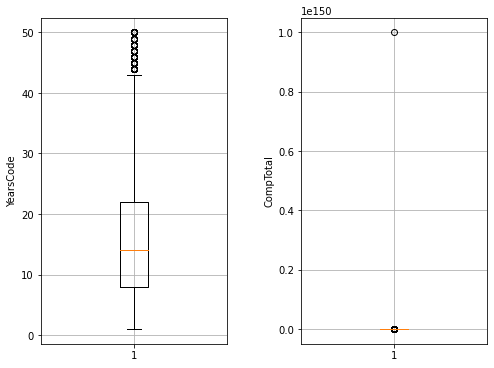

In [670]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.boxplot(yearsCodeData.YearsCode)
plt.ylabel("YearsCode")
plt.grid()
plt.subplot(1,2,2)
plt.boxplot(yearsCodeData.CompTotal)
plt.ylabel("CompTotal")
plt.grid()
plt.show()

As we can see from the two boxplots, any values outside of our whiskers we can consider removing from our data.It is also important to notice that the outliers are so extreme for CompTotal that the boxplot is actually invisible. 

Now in order to drop the outliers, let us multiply the interquartile range(IQR) by 1.5 and our range for our dataset becomes lower = lower quartile - 1.5*(IQR) and  upper = upper quartile + 1.5*(IQR). Therefore any values outside this range we shall drop.
For more information about outliers:https://www.thoughtco.com/what-is-an-outlier-3126227

In [671]:
#upper quartile = 75 percentile, lower quartile = 25 percentile
compTotalIQR = yearsCodeData.CompTotal.quantile(.75) - yearsCodeData.CompTotal.quantile(.25)
yearsCodeIQR = yearsCodeData.YearsCode.quantile(.75) - yearsCodeData.YearsCode.quantile(.25)
yearsCodeData = yearsCodeData.drop(yearsCodeData[yearsCodeData.CompTotal > yearsCodeData.CompTotal.quantile(.75)+1.5*compTotalIQR].index)
yearsCodeData = yearsCodeData.drop(yearsCodeData[yearsCodeData.CompTotal < yearsCodeData.CompTotal.quantile(.25)-1.5*compTotalIQR].index)
yearsCodeData = yearsCodeData.drop(yearsCodeData[yearsCodeData.YearsCode > yearsCodeData.YearsCode.quantile(.75)+1.5*yearsCodeIQR].index)
yearsCodeData = yearsCodeData.drop(yearsCodeData[yearsCodeData.YearsCode < yearsCodeData.YearsCode.quantile(.25)-1.5*yearsCodeIQR].index)


print("Size of data:", yearsCodeData.shape)
yearsCodeData.head()

Size of data: (7695, 2)


,CompTotal,YearsCode
7,116000.0,17.0
13,66000.0,5.0
16,79000.0,7.0
17,105000.0,19.0
18,83400.0,9.0


Now we may consider our data to be within a more reasonable range so let us begin plotting.

For more information about the trendline I used: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

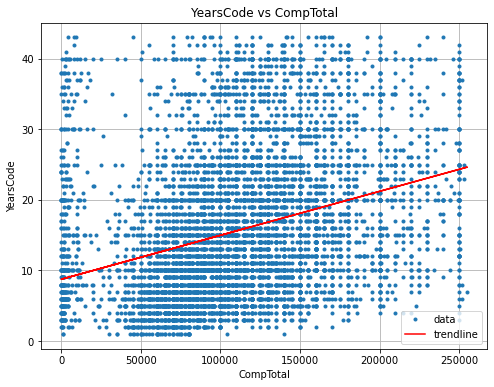

In [672]:
figure(figsize=(8,6))
plt.plot(yearsCodeData.CompTotal, yearsCodeData.YearsCode, ".",label = "data")
plt.title("YearsCode vs CompTotal")
plt.xlabel("CompTotal")
plt.ylabel("YearsCode")
plt.grid()

#create our trendline
z = numpy.polyfit(yearsCodeData.CompTotal,yearsCodeData.YearsCode, deg=1)
p = numpy.poly1d(z)
plt.plot(yearsCodeData.CompTotal, p(yearsCodeData.CompTotal),"r", label="trendline")
plt.legend()
plt.show()

Conclusion:

Here according to the data and trendline plotted, we can see that there is a correlation between YearsCode and the Comptotal. Although it may have seemed obvious already, the more experience people acquire within the computer science field, the more likely that they will be paid more money.


-------------------------------------------------------------------------------------------------------------------------------

2) Another useful thing to investigate would be if there is a relationship between the age someone begins coding and the amount of salary they make now.

In [673]:
firstCodeData = USdata[["CompTotal","Age1stCode"]]

print("Size of data:",firstCodeData.shape)
firstCodeData.head()

Size of data: (8171, 2)


,CompTotal,Age1stCode
7,116000.0,12
13,66000.0,13
16,79000.0,14
17,105000.0,12
18,83400.0,15


We already know from part 1 how to prepare all of the data by removing the NaN values and removing any outliers, so let us quickly do so.

In [674]:
#remove any string values by turning them into NaN values first
firstCodeData.Age1stCode = pandas.to_numeric(firstCodeData.Age1stCode,errors="coerce") #turns into NaN if unable to parse string
#remove the NaN
firstCodeData = firstCodeData.dropna()

#remove outliers
compTotalIQR = firstCodeData.CompTotal.quantile(.75) - firstCodeData.CompTotal.quantile(.25)
firstCodeIQR = firstCodeData.Age1stCode.quantile(.75) - firstCodeData.Age1stCode.quantile(.25)
firstCodeData = firstCodeData.drop(firstCodeData[firstCodeData.CompTotal > firstCodeData.CompTotal.quantile(.75)+1.5*compTotalIQR].index)
firstCodeData = firstCodeData.drop(firstCodeData[firstCodeData.CompTotal < firstCodeData.CompTotal.quantile(.25)-1.5*compTotalIQR].index)
firstCodeData = firstCodeData.drop(firstCodeData[firstCodeData.Age1stCode > firstCodeData.Age1stCode.quantile(.75)+1.5*firstCodeIQR].index)
firstCodeData = firstCodeData.drop(firstCodeData[firstCodeData.Age1stCode < firstCodeData.Age1stCode.quantile(.25)-1.5*firstCodeIQR].index)

print("Size of data:", firstCodeData.shape)
firstCodeData.head()

Size of data: (7546, 2)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,CompTotal,Age1stCode
7,116000.0,12.0
13,66000.0,13.0
16,79000.0,14.0
17,105000.0,12.0
18,83400.0,15.0


Now we can plot the data in order to see if there is a possible relationship.

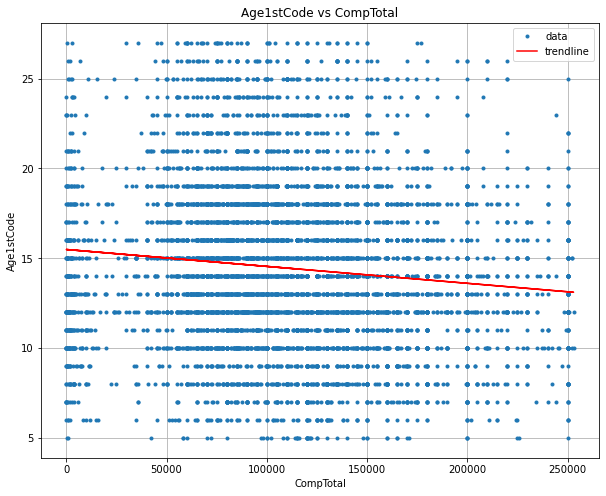

In [675]:
figure(figsize=(10,8))
plt.plot(firstCodeData.CompTotal, firstCodeData.Age1stCode, ".",label = "data")
plt.title("Age1stCode vs CompTotal")
plt.xlabel("CompTotal")
plt.ylabel("Age1stCode")
plt.grid()

#create our trendline
z = numpy.polyfit(firstCodeData.CompTotal,firstCodeData.Age1stCode, deg=1)
p = numpy.poly1d(z)
plt.plot(firstCodeData.CompTotal, p(firstCodeData.CompTotal),"r", label="trendline")
plt.legend()
plt.show()

Conclusion:

After examining the plot, it becomes evident that there is a slight correlation between the age someone first begins coding and how much their salary is. The younger someone first begins to code, the more money they are likely to make in the future.

---------------------------------------------------------------------------------------------------------------------------------------------

3) After examining the age someone first codes and how many years they have been coding for, I would think its important to see if a correlation exists between their salary and what their education level is

In [676]:
educationData = USdata[["CompTotal", "EdLevel"]]

print("Size of data:",educationData.shape)
educationData.head()

Size of data: (8171, 2)


,CompTotal,EdLevel
7,116000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
13,66000.0,"Associate degree (A.A., A.S., etc.)"
16,79000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
17,105000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
18,83400.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"


Just out of curiosity, let us see all the different types of education levels users inputted into the survey so we know what we are going to be comparing.

In [677]:
print(educationData.EdLevel.unique())

['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Associate degree (A.A., A.S., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Professional degree (JD, MD, etc.)'
 'Other doctoral degree (Ph.D., Ed.D., etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'I never completed any formal education' 'Primary/elementary school' nan]


Each string education level is long, so lets shorten them inside the dataframe.

In [678]:
educationData = educationData.replace("\(.*","",regex=True)
educationData.head()

,CompTotal,EdLevel
7,116000.0,Bachelor’s degree
13,66000.0,Associate degree
16,79000.0,Bachelor’s degree
17,105000.0,Bachelor’s degree
18,83400.0,Bachelor’s degree


Once again, lets prepare the data by removing any NaN values and all the outliers.

In [679]:
#remove the NaN
educationData = educationData.dropna()

#remove outliers
compTotalIQR = educationData.CompTotal.quantile(.75) - educationData.CompTotal.quantile(.25)
educationData = educationData.drop(educationData[educationData.CompTotal > educationData.CompTotal.quantile(.75)+1.5*compTotalIQR].index)
educationData = educationData.drop(educationData[educationData.CompTotal < educationData.CompTotal.quantile(.25)-1.5*compTotalIQR].index)

print("Size of data:", educationData.shape)
educationData.head()

Size of data: (7809, 2)


,CompTotal,EdLevel
7,116000.0,Bachelor’s degree
13,66000.0,Associate degree
16,79000.0,Bachelor’s degree
17,105000.0,Bachelor’s degree
18,83400.0,Bachelor’s degree


Now let us begin our plotting.

However, it is important to notice that a simple scatter plot and a trendline isn't going to work here because there is no regression occuring here. So instead, let us considering the use of boxplots but in order to do so, we will have to separate each education level into its own dataframe and plot them separately.

In [680]:
separatedEducationLevels = []
educationLevels = educationData.EdLevel.unique()
for level in educationLevels:
    separatedEducationLevels.append(educationData[educationData.EdLevel == level])


Now let us begin plotting using boxplots.

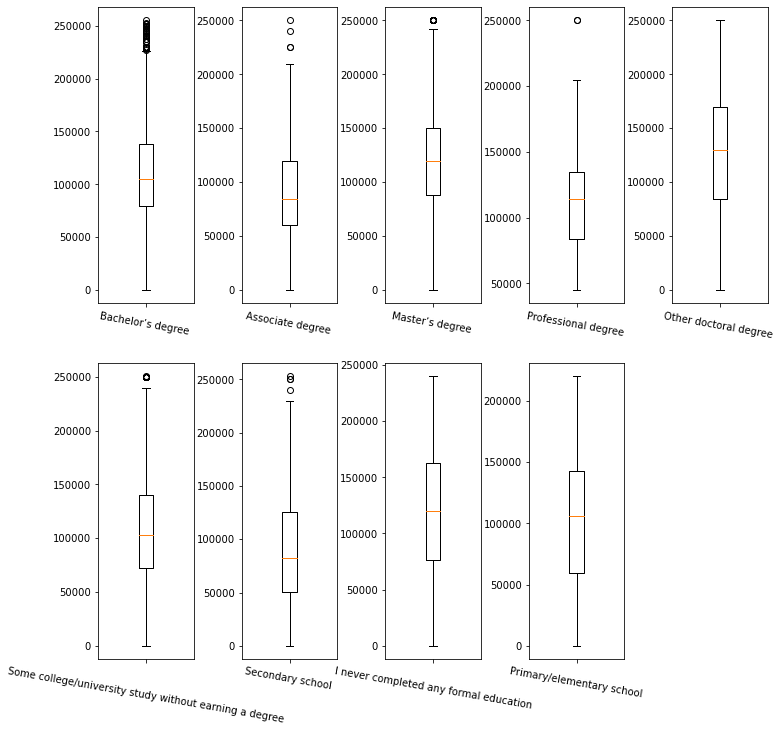

In [681]:
fig = plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=0.2,wspace=0.5)

for i,level in enumerate(separatedEducationLevels):
    plt.subplot(2,5,i+1)
    plt.boxplot(separatedEducationLevels[i].CompTotal)
    plt.xticks([1],[educationLevels[i]],rotation = -10)
plt.show()

Conclusion:

After comparing each boxplot, it appears that people who obtained a masters degree on average had a higher salary. In addition, it also demonstrates that people who only recieved an associates degree or only attended secondary school on average had the lowest salary.

--------------------------------------------------------------------------------------------------------------------------------------------------

4) Now let us see if there is some sort of correlation between coding languages and salary

In [682]:
languageData = USdata[["CompTotal","LanguageWorkedWith"]]

print("Size of data:",languageData.shape)
languageData.head()

Size of data: (8171, 2)


,CompTotal,LanguageWorkedWith
7,116000.0,Python;SQL
13,66000.0,HTML/CSS;JavaScript;SQL;TypeScript
16,79000.0,C#;HTML/CSS;JavaScript;Python;SQL;VBA
17,105000.0,Bash/Shell/PowerShell;HTML/CSS;Perl
18,83400.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...


Just from examining the data, we can see that one person can code using multiple different languages at once so in order to handle this we will take turns recording the data for each langauge.

But first, we must remove any NaN values that may disrupt our process and any outliers.

In [683]:
languageData = languageData.dropna()

compTotalIQR = languageData.CompTotal.quantile(.75) - languageData.CompTotal.quantile(.25)
languageData = languageData.drop(languageData[languageData.CompTotal > languageData.CompTotal.quantile(.75)+1.5*compTotalIQR].index)
languageData = languageData.drop(languageData[languageData.CompTotal < languageData.CompTotal.quantile(.25)-1.5*compTotalIQR].index)

print("Size of data:",languageData.shape)
languageData.head()

Size of data: (7613, 2)


,CompTotal,LanguageWorkedWith
7,116000.0,Python;SQL
13,66000.0,HTML/CSS;JavaScript;SQL;TypeScript
16,79000.0,C#;HTML/CSS;JavaScript;Python;SQL;VBA
17,105000.0,Bash/Shell/PowerShell;HTML/CSS;Perl
18,83400.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...


Now begin creating datasets for each language.

In [684]:
differentLanguagesData = {}

#get all of the different languages in the column
differentLanguages = list({language for row in languageData.LanguageWorkedWith.str.split(";") for language in row })

print("Different languages:\n",(", ").join(differentLanguages))

for language in differentLanguages:
    #a complicated regex to catch 'C' is necessary so we dont grab 'C++' or 'C#' instead
    if language == "C":
        differentLanguagesData[language] = (languageData.loc[languageData.LanguageWorkedWith.str.contains("(C[;])|(C)$")])
    #If we leave it as 'C++' a regex multiple repeat expression will rise so we dodge this by doing the following 
    elif language == "C++":
        differentLanguagesData[language] = (languageData.loc[languageData.LanguageWorkedWith.str.contains("C+")])
    else:
        differentLanguagesData[language] = (languageData.loc[languageData.LanguageWorkedWith.str.contains(language)])
        

Different languages:
 Kotlin, Bash/Shell/PowerShell, Python, TypeScript, Objective-C, R, Assembly, VBA, HTML/CSS, JavaScript, Go, Ruby, Scala, PHP, C#, Swift, Haskell, Perl, C, C++, Julia, Rust, Dart, Java, SQL


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Now we can create several different subplots in order to analyze all of the different salaries of the different languages.

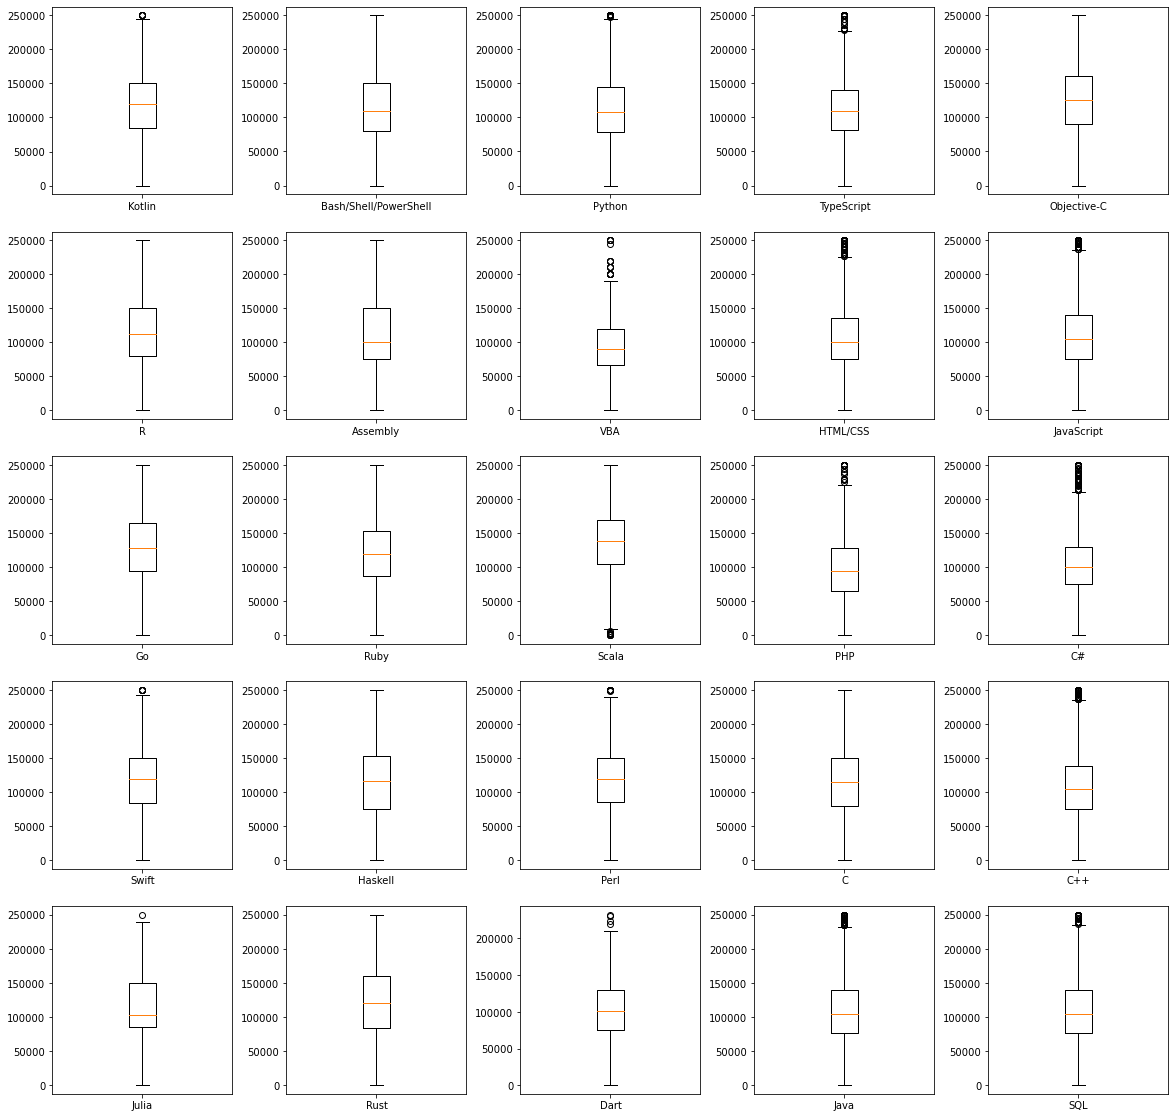

In [685]:
fig = plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.2,wspace=0.3)
i = 1
for key,value in differentLanguagesData.items():
    plt.subplot(5,5,i)
    plt.boxplot(value.CompTotal)
    plt.xticks([1],[key])
    i+=1
        
plt.show()

Wow thats a lot of data to look at! Let us quickly condense this into the top languages we are most familiar with and re-plot in order to compare.

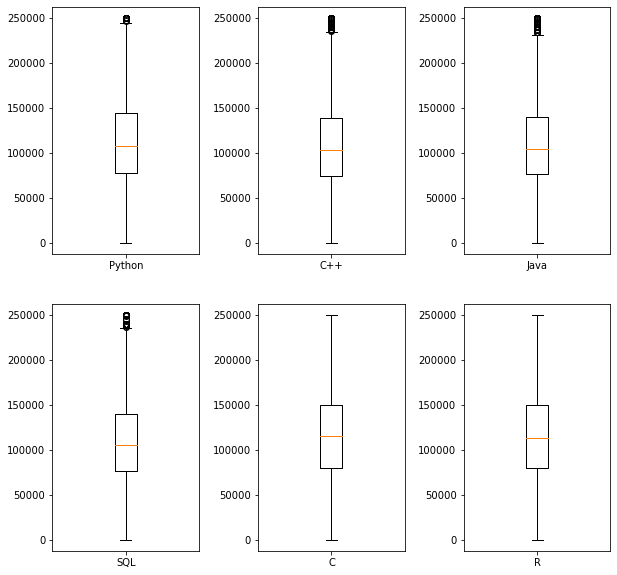

In [686]:
languagesToPlot=["Python","C++","Java","SQL","C","R"]
fig = plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.2,wspace=0.4)
for i in range(len(languagesToPlot)):
    plt.subplot(2,3,i+1)
    plt.boxplot(differentLanguagesData[languagesToPlot[i]].CompTotal)
    plt.xticks([1],[languagesToPlot[i]])
        
plt.show()

Now it is much easier to look at with only six different languages to compare at once. However, these boxplots all look very similar so resort to numerical values in order to compare.

In [687]:
for i in range(len(languagesToPlot)):
    print(languagesToPlot[i],differentLanguagesData[languagesToPlot[i]].describe(),"\n")

Python            CompTotal
count    3647.000000
mean   111852.716753
std     53311.704159
min         0.000000
25%     77812.500000
50%    108000.000000
75%    145000.000000
max    250000.000000 

C++            CompTotal
count    6260.000000
mean   108301.450319
std     50995.573261
min         0.000000
25%     75000.000000
50%    104000.000000
75%    139000.000000
max    250000.000000 

Java            CompTotal
count    6179.000000
mean   109230.454119
std     50623.362501
min         0.000000
25%     77000.000000
50%    105000.000000
75%    140000.000000
max    250000.000000 

SQL            CompTotal
count    4728.000000
mean   108698.242809
std     49130.270363
min         0.000000
25%     76500.000000
50%    105000.000000
75%    140000.000000
max    250000.000000 

C            CompTotal
count    1333.000000
mean   117373.632408
std     57006.350048
min         0.000000
25%     80000.000000
50%    115000.000000
75%    150000.000000
max    250000.000000 

R            CompTotal


Conclusion:

Now it becomes clear to us that among the six chosen computer science languages, people who coded in C had the highest average salary with about 139,000 per year. People who coded in SQL had the lowest average salary with about 118,000 per year. In addition, C++ actually had the lowest 25 percentile range value which actually means that of people who code in C++, 25 percent of people make less than 75,000 per year which is the lowest among the six languages.

Therefore, in conclusion we can say that there is a slight correlation with how much money you make per year and which language you decide to have a career programming in.

--------------------------------------------------------------------------------------------------------------------------------

5) Finally, I think it would be interesting to compare people who code on their free time compared to people who only do it as a job. Therefore let us CompTotal and Hobbyist

Let us begin using the same steps from 3 and 4 in order to prepare all of the data and show what we are working with.

In [688]:
hobbyistData = USdata[["CompTotal","Hobbyist"]]

print("Size of data:",hobbyistData.shape)
hobbyistData.head()

Size of data: (8171, 2)


,CompTotal,Hobbyist
7,116000.0,Yes
13,66000.0,Yes
16,79000.0,Yes
17,105000.0,Yes
18,83400.0,No


Drop any NaN values and remove outliers.

In [689]:
hobbyistData = hobbyistData.dropna()

hobbyistIQR = hobbyistData.CompTotal.quantile(.75)-hobbyistData.CompTotal.quantile(.25)
hobbyistData = hobbyistData.drop(hobbyistData[hobbyistData.CompTotal > hobbyistData.CompTotal.quantile(.75) + 1.5*hobbyistIQR].index)
hobbyistData = hobbyistData.drop(hobbyistData[hobbyistData.CompTotal < hobbyistData.CompTotal.quantile(.25) - 1.5*hobbyistIQR].index)

print("Size of data:", hobbyistData.shape)
hobbyistData.head()

Size of data: (7859, 2)


,CompTotal,Hobbyist
7,116000.0,Yes
13,66000.0,Yes
16,79000.0,Yes
17,105000.0,Yes
18,83400.0,No


It is good to double check that only Yes and No answers are within our data.

In [690]:
print(hobbyistData.Hobbyist.unique())

['Yes' 'No']


Now we can begin our analysis using boxplots once again.

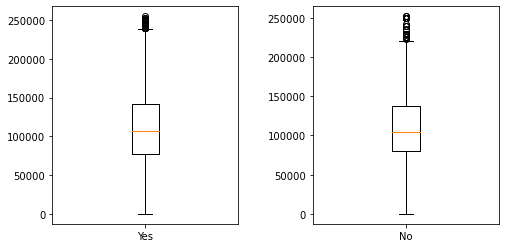

In [691]:
fig = plt.figure(figsize=(8,4))
plt.subplots_adjust(hspace=0.2,wspace=0.4)
plt.subplot(1,2,1)
plt.boxplot(hobbyistData[hobbyistData.Hobbyist == "Yes"].CompTotal)
plt.xticks([1],["Yes"])

plt.subplot(1,2,2)
plt.boxplot(hobbyistData[hobbyistData.Hobbyist == "No"].CompTotal)
plt.xticks([1],["No"])
plt.show()

Conclusion:

Although it may be difficult to see, but if we look closely we can see that people who do program as a hobby also do tend to have a higher salary in their career. However, both interquartile ranges are very similar so I dont think we can make a definitive statement saying that if you code on your spare time, you will make more money compared to someone who doesnt.

------------------------------------------------------------------------------------------------------------------------------

Final thoughts and suggestions:

The dataset we worked with was fairly large since it was obtained through surverying anyone who visited stackoverflow.com for a period of time. As a result, this allowed anybody to input anything they wanted and I noticed that was the case when I was trying to investigate outliers; people had salaries bigger than the trillions(wow! they must be filthy rich!). Therefore I think this project could've been more effective if the dataset was surveryed more securely because I think the correlations would be much more evident to the data scientist looking at them, aka myself. In addition, this is a survery only conducted on stackoverflow.com so the data is automatically biased because usually only people who are looking for help visit stackoverflow, a person who may be a genius programmer who has a high salary may not be included in this dataset since they never have to visit this website for help.